# Plot Training Logs : A2C_cartpole

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

In [8]:
files = glob.glob('../models/DQN_FrozenLake*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\DQN FrozenLake 4x4 24-07-29 14-38 log.csv
 1 | ../models\DQN FrozenLake 4x4 24-07-29 14-39 log.csv
 2 | ../models\DQN FrozenLake 4x4 24-07-29 14-41 log.csv
 3 | ../models\DQN FrozenLake 4x4 24-07-29 14-43 log.csv


In [9]:
choice = -1 # Make your choice here

##### Printing the hyperparameters

In [10]:
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:>30s} : {val}')


Hyperparameters 
----------------------------------------
                  NUM_EPISODES : 2000
                     OBS_AGENT : False
                      MAP_NAME : 4x4
               NEG_REWARD_LAKE : True
                         GAMMA : 0.9
                       NN_SIZE : 32
                 NN_TWO_LAYERS : True
                 DQN_EPS_START : 1
                   DQN_EPS_END : 0.05
                 DQN_EPS_DECAY : 3000
                  DQN_MEM_SIZE : 2000
            DQN_MEM_BATCH_SIZE : 32
  DQN_NETWORK_REFRESH_STRATEGY : hard
                       DQN_TAU : 0.01
                        DQN_LR : 0.01
                        DQN_L2 : 0


##### Plotting the data

In [11]:
df = pd.read_csv(files[choice])

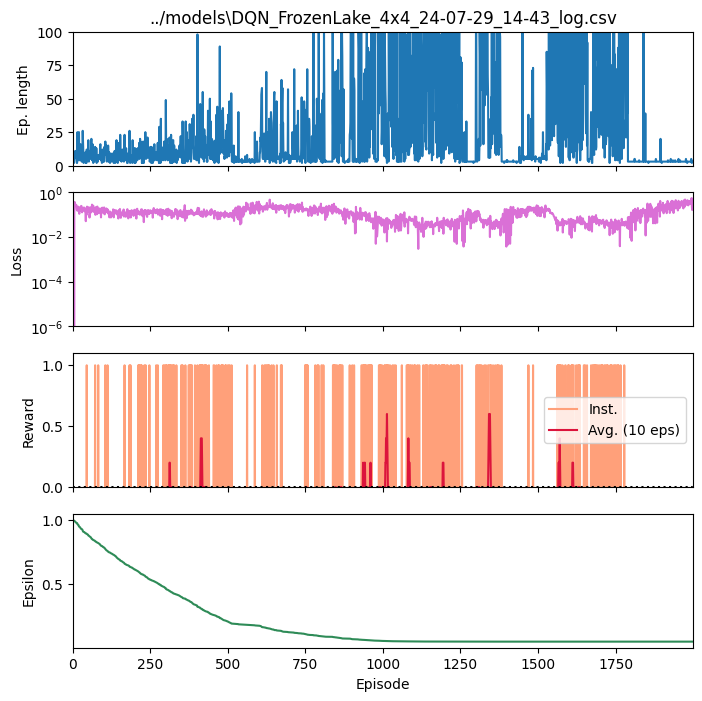

In [12]:
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].semilogy(df['episode'], df['loss'], color='orchid')
axes[2].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[2].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')
axes[3].plot(df['episode'], df['epsilon'], color='seagreen', label='Avg. (10 eps)')

# Formatting
axes[1].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[2].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[2].plot(df['episode'], 500 * np.ones_like(df['cum_reward']), '--', color='chartreuse')
axes[0].set_ylabel('Ep. length')
axes[1].set_ylabel('Loss')
axes[2].set_ylabel('Reward')
axes[3].set_ylabel('Epsilon')
axes[2].legend()

axes[0].set_ylim([0, 100])
axes[1].set_ylim([1e-6,1])
axes[2].set_ylim([0, 1.1])
axes[2].set_xlim([0, df['episode'].max()])
axes[3].set_xlabel('Episode')

axes[0].set_title(files[choice])

fig.savefig(files[choice].replace('log.csv','fig.png'))